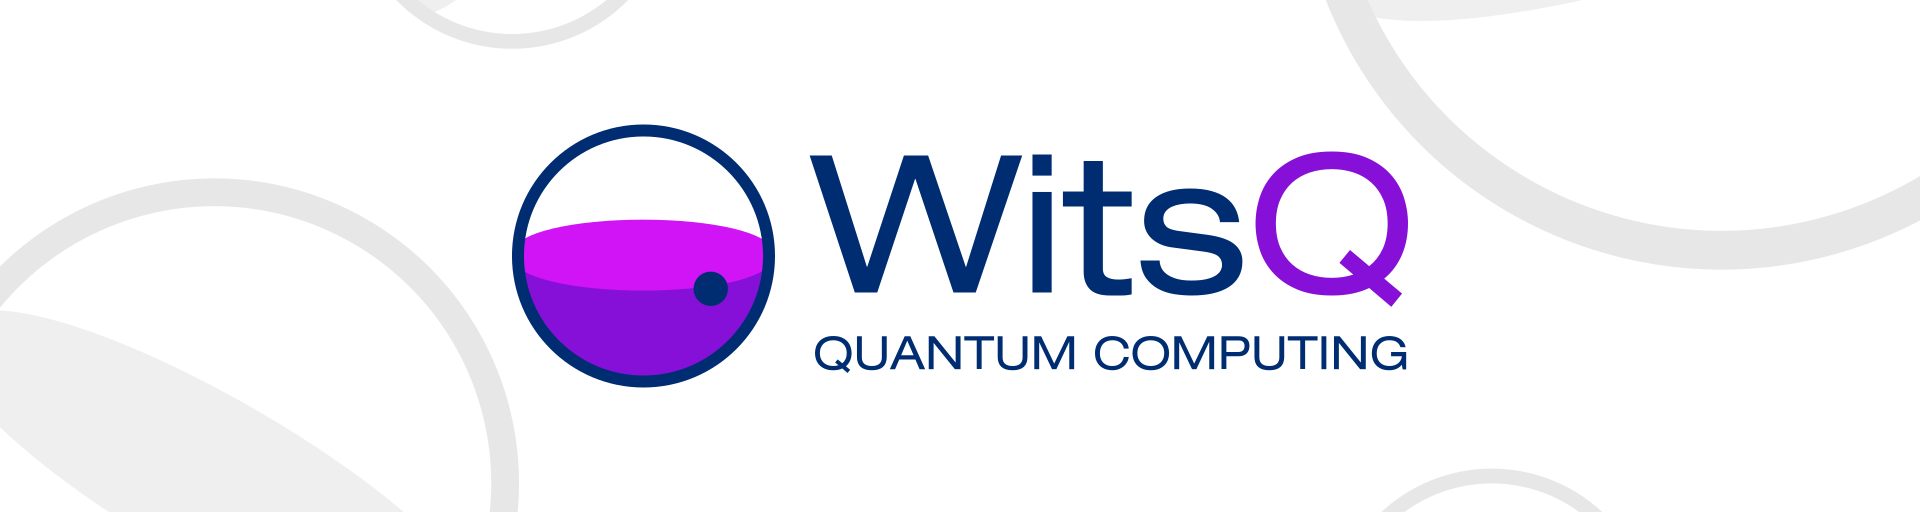

In [1]:
from IPython.display import Image
Image(filename="witsq_banner.png")
# <img src="witsq_banner.png" align="center"/>

<h1 style="font-size:72px;">Qiskit Workflow</h1>

_Conrad J. Haupt, WitsQ Team_


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, BasicAer
from qiskit.compiler import transpile
from qiskit.extensions import RXGate, CnotGate, XGate
import matplotlib.pyplot as plt
%matplotlib inline

# Building a Circuit

In [ ]:
# Here we initialise our quantum and classical register
qr_1 = QuantumRegister(3)
cr_1 = ClassicalRegister(3)

In [ ]:
# Construct the circuit
circ_1 = QuantumCircuit(qr_1, cr_1)
circ_1.draw(output='mpl')

# Add some gates
circ_1.h([0,1,2])
# circ_1.h(qr_1)

circ_1.x([0,1])
# circ_1.x(qr_1)

# Draw!
circ_1.draw(output='mpl')

## Ex. 1: Comment lines 6 and 9 and uncomment lines 7 and 10 in the above cell and describe below what happened to the output circuit

## Ex. 2: Build the following circuit using the following gates

<!-- <img src="circuit_1.png" width="75%"/> -->
1. Y Gate
2. CX gate
3. RY Gate
4. Hadamard Gate

The Qiskit documentation is found at https://qiskit.org/documentation/index.html

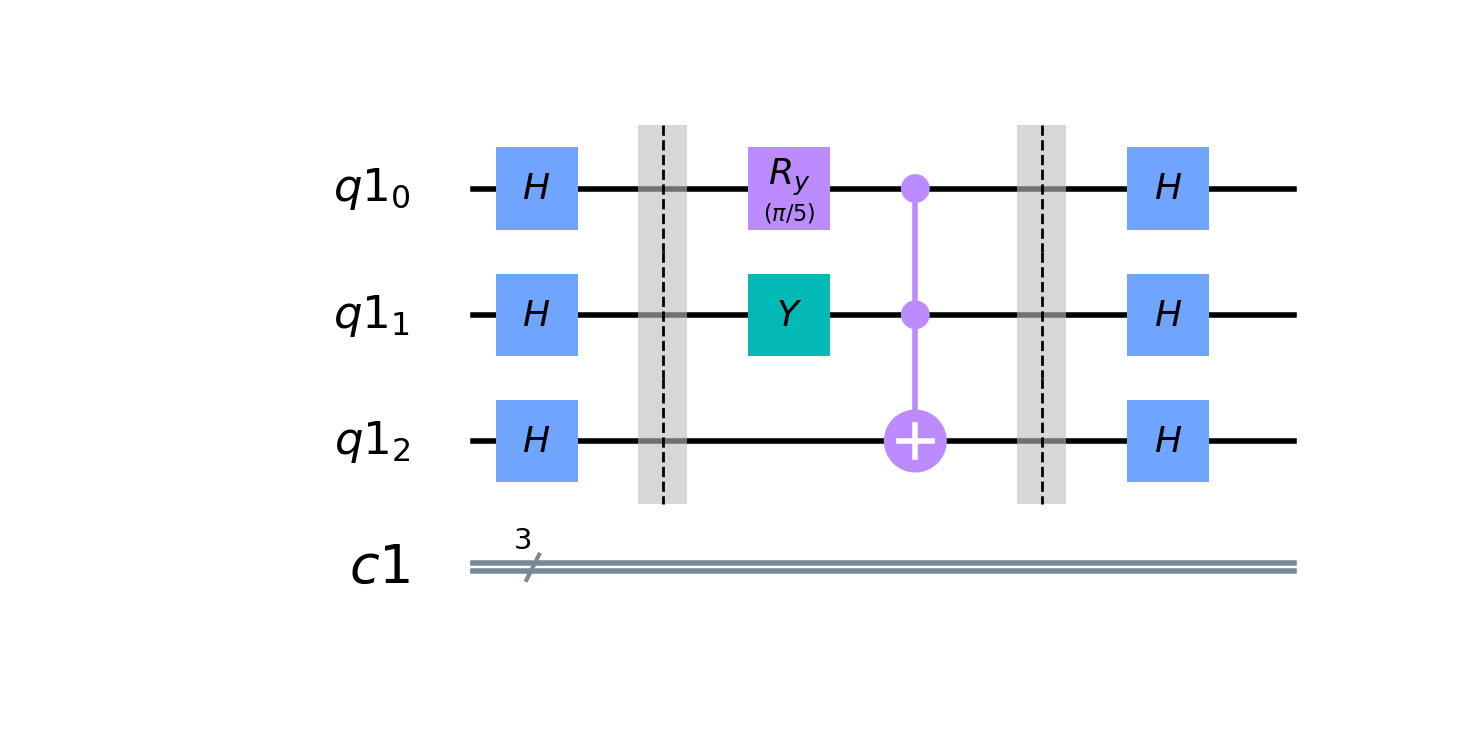

In [2]:
from IPython.display import Image
Image(filename="circuit_1.png")

In [ ]:
# DO NOT EDIT THIS CELL
qr_2 = QuantumRegister(3)
cr_2 = ClassicalRegister(3)

In [ ]:
# Add your gates to circ_2
circ_2 = QuantumCircuit(qr_2,cr_2)

#######################
# Add your gates here #
#######################

circ_2.draw(output='mpl')

# Let's build a generic circuit with a parameter

In [ ]:
from qiskit.circuit import Parameter

In [ ]:
qr_3 = QuantumRegister(5)
cr_3 = ClassicalRegister(5)

In [ ]:
circ_3 = QuantumCircuit(qr_3,cr_3)
circ_3.h(0)

# Add CNOT gates for some pairs of qubits in the circuit
for iq_c,iq_x in zip(qr_3[:-1],qr_3[1:]):
    circ_3.cx(iq_c,iq_x)


circ_3.barrier()
param_theta = Parameter('θ') # Note: The string uses unicode characters

###########################################################
# EX. 3: A
dd duplicate rx gates to the remaining 4 qubits #
###########################################################

circ_3.rx(param_theta,0)

###########################################################
circ_3.barrier()

    
# Add final CNOT gates
for iq_c,iq_x in reversed([a for a in zip(qr_3[:-1],qr_3[1:])]):
    circ_3.cx(iq_c,iq_x)

circ_3.barrier()
    
circ_3.measure(qr_3,cr_3)

circ_3.draw(output='mpl')

# Bind the parameter and simulate the circuit

In [ ]:
# This is an example on how to bind a circuit parameter to a value
# theta_circuits_pi_temp = circ_3.bind_parameters({param_theta: np.pi/5})

##########################################################
# Ex. 4: Bind your circuit to the following theta values #
#  and store the output circuits, one per theta value.   #
##########################################################

theta_values = [np.pi/5, np.pi*2/5, np.pi*3/5, np.pi*4/5]

# Modify this line
theta_circuits = [circ_3.bind_parameters({param_theta: np.pi/17})]

## Simulate each circuit


In [ ]:
from qiskit import BasicAer
from qiskit.visualization import plot_histogram

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
results = [execute(circ,backend).result() for circ in theta_circuits]

## Ex. 5: Plot the results of some of the results using plot_histogram

In [ ]:
#### Remember that plot_histogram() takes the output of get_counts() as the argument
# plot_histogram(...get_counts())

# Sub-Circuits
We can store a circuit as a building block by encapsulating it into a sub-circuit. This is done as following.

In [ ]:
# This is an example circuit that we want to use multiple times
# NOTE THAT WE ARE NOT USING A CLASSICAL REGISTER
qr_4 = QuantumRegister(3)
circ_4 = QuantumCircuit(qr_4, name='ourSubBlock')

circ_4.cx(0,1)
circ_4.y(2)
circ_4.cx(2,0)

circ_4.draw(output='mpl')

In [ ]:
# This is the circuit in which we want to use our smaller sub-circuit
qr_5 = QuantumRegister(4)
cr_5 = ClassicalRegister(4)
circ_5 = QuantumCircuit(qr_5,cr_5)

circ_5.draw(output='mpl')

### Add the sub-circuit to the larger parent circuit

In [ ]:

sub_circ_4 = circ_4.to_instruction()
# Apply our block

circ_5.append(sub_circ_4,qr_5[0:3])
circ_5.append(sub_circ_4,qr_5[1:4])

circ_5.draw(output='mpl')

## We can see the full circuit by decomposing the parent circuit

In [ ]:
circ_5.decompose().draw(output='mpl')

# Ex. 6: Build a teleportation circuit as a sub-circuit and apply it to circ_5

In [ ]:
# Build your circuit here